In [1]:
import psycopg2
import pandas as pd
import numpy as np

from yellowbrick.features import RadViz

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib notebook 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

conn = psycopg2.connect( 
                        host = 'project.cgxhdwn5zb5t.us-east-1.rds.amazonaws.com',
                        port = 5432, 
                        user = 'postgres',
                        password = 'Admin123',
                        database = 'postgres')
cursor = conn.cursor()

In [2]:
DEC2FLOAT = psycopg2.extensions.new_type(
    psycopg2.extensions.DECIMAL.values,
    'DEC2FLOAT',
    lambda value, curs: float(value) if value is not None else None)
psycopg2.extensions.register_type(DEC2FLOAT)

In [3]:
cursor.execute('SELECT * FROM "ahshouseholdclass"')
rows = cursor.fetchall()
col_names = []
for elt in cursor.description:
    col_names.append(elt[0])

df = pd.DataFrame(data=rows, columns=col_names).fillna(0)

In [4]:
df.columns

Index(['index', 'CONTROL', 'YEAR', 'RATINGHS_BIN', 'BEDROOMS', 'STORIES',
       'PERPOVLVL', 'HHADLTKIDS', 'HINCP', 'UNITSIZE', 'NUMVETS', 'LOTSIZE',
       'UFINROOMS', 'HHAGE', 'PARTNER', 'OTHERAMT', 'KITCHENS', 'NUMSECFAM',
       'OILAMT', 'DINING', 'FINCP', 'NUMELDERS', 'WATERAMT', 'GASAMT',
       'TOTROOMS', 'HHYNGKIDS', 'NUMSUBFAM', 'BATHROOMS', 'NUMYNGKIDS',
       'TRASHAMT', 'NUMOLDKIDS', 'NUMNONREL', 'NUMPEOPLE', 'HHMOVE', 'UTILAMT',
       'ELECAMT', 'NUMADULTS', 'MULTIGEN', 'LAUNDY', 'HHOLDKIDS', 'FINROOMS',
       'LN_HINCP', 'LN_FINCP', 'HINCP_BIN', 'FINCP_BIN', 'NUMCARE', 'NUMWALK',
       'HHRACE', 'OMB13CBSA', 'HSHLDTYPE', 'MVG3COST', 'MVG2COST', 'MILHH',
       'HHMAR', 'HHNATVTY', 'COOKFUEL', 'NUMMEMRY', 'NUMERRND', 'NUMSEE',
       'BLD', 'NUMHEAR', 'MVG1COST', 'DIVISION', 'FIREPLACE', 'CONDO',
       'OWNLOT', 'FRIDGE', 'FIRSTHOME', 'HHCARE', 'NOSTEP', 'WASHER', 'HHSEE',
       'KITCHSINK', 'HHERRND', 'WINBARS', 'HHWALK', 'HHHEAR', 'HHSEX',
       'HHMEMRY', 'GA

In [7]:
df.shape

(20108, 81)

In [ ]:
#'HINCP_BIN', 'FINCP_BIN',

features = ['BEDROOMS', 'STORIES',
       'PERPOVLVL', 'HHADLTKIDS', 'HINCP', 'UNITSIZE', 'NUMVETS', 'LOTSIZE',
       'UFINROOMS', 'HHAGE', 'PARTNER', 'OTHERAMT', 'KITCHENS', 'NUMSECFAM',
       'OILAMT', 'DINING', 'FINCP', 'NUMELDERS', 'WATERAMT', 'GASAMT',
       'TOTROOMS', 'HHYNGKIDS', 'NUMSUBFAM', 'BATHROOMS', 'NUMYNGKIDS',
       'TRASHAMT', 'NUMOLDKIDS', 'NUMNONREL', 'NUMPEOPLE', 'HHMOVE', 'UTILAMT',
       'ELECAMT', 'NUMADULTS', 'MULTIGEN', 'LAUNDY', 'HHOLDKIDS', 'FINROOMS',
       'LN_HINCP', 'LN_FINCP', 'NUMCARE', 'NUMWALK',
       'HHRACE', 'OMB13CBSA', 'HSHLDTYPE', 'MVG3COST', 'MVG2COST', 'MILHH',
       'HHMAR', 'HHNATVTY', 'COOKFUEL', 'NUMMEMRY', 'NUMERRND', 'NUMSEE',
       'BLD', 'NUMHEAR', 'MVG1COST', 'DIVISION', 'FIREPLACE', 'CONDO',
       'OWNLOT', 'FRIDGE', 'FIRSTHOME', 'HHCARE', 'NOSTEP', 'WASHER', 'HHSEE',
       'KITCHSINK', 'HHERRND', 'WINBARS', 'HHWALK', 'HHHEAR', 'HHSEX',
       'HHMEMRY', 'GARAGE', 'DISHWASH']
target = ['RATINGHS_BIN']

In [ ]:
y = df[target]

In [ ]:
df[features].dtypes

In [ ]:
df[features] = df[features].astype(float)

In [ ]:
df['RATINGHS_BIN']

### Class Balance

In [ ]:
from yellowbrick.target import ClassBalance

# Load multi-class classification dataset
X = df[features]
y = df['RATINGHS_BIN']

# Instantiate the visualizer
visualizer = ClassBalance(labels=["not statisfied", "statisfied", "very statisfied", "extremely statisfied"],
                          size=(500, 500)
)

visualizer.fit(y)
visualizer.show()

### Random Forest Classifer - Feature Importances

In [ ]:
#Using Randomforest classifier
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances

X = df[features]
y = df[target]

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model, size=(800, 1500))

viz.fit(X, y)
viz.show()

### RadViz

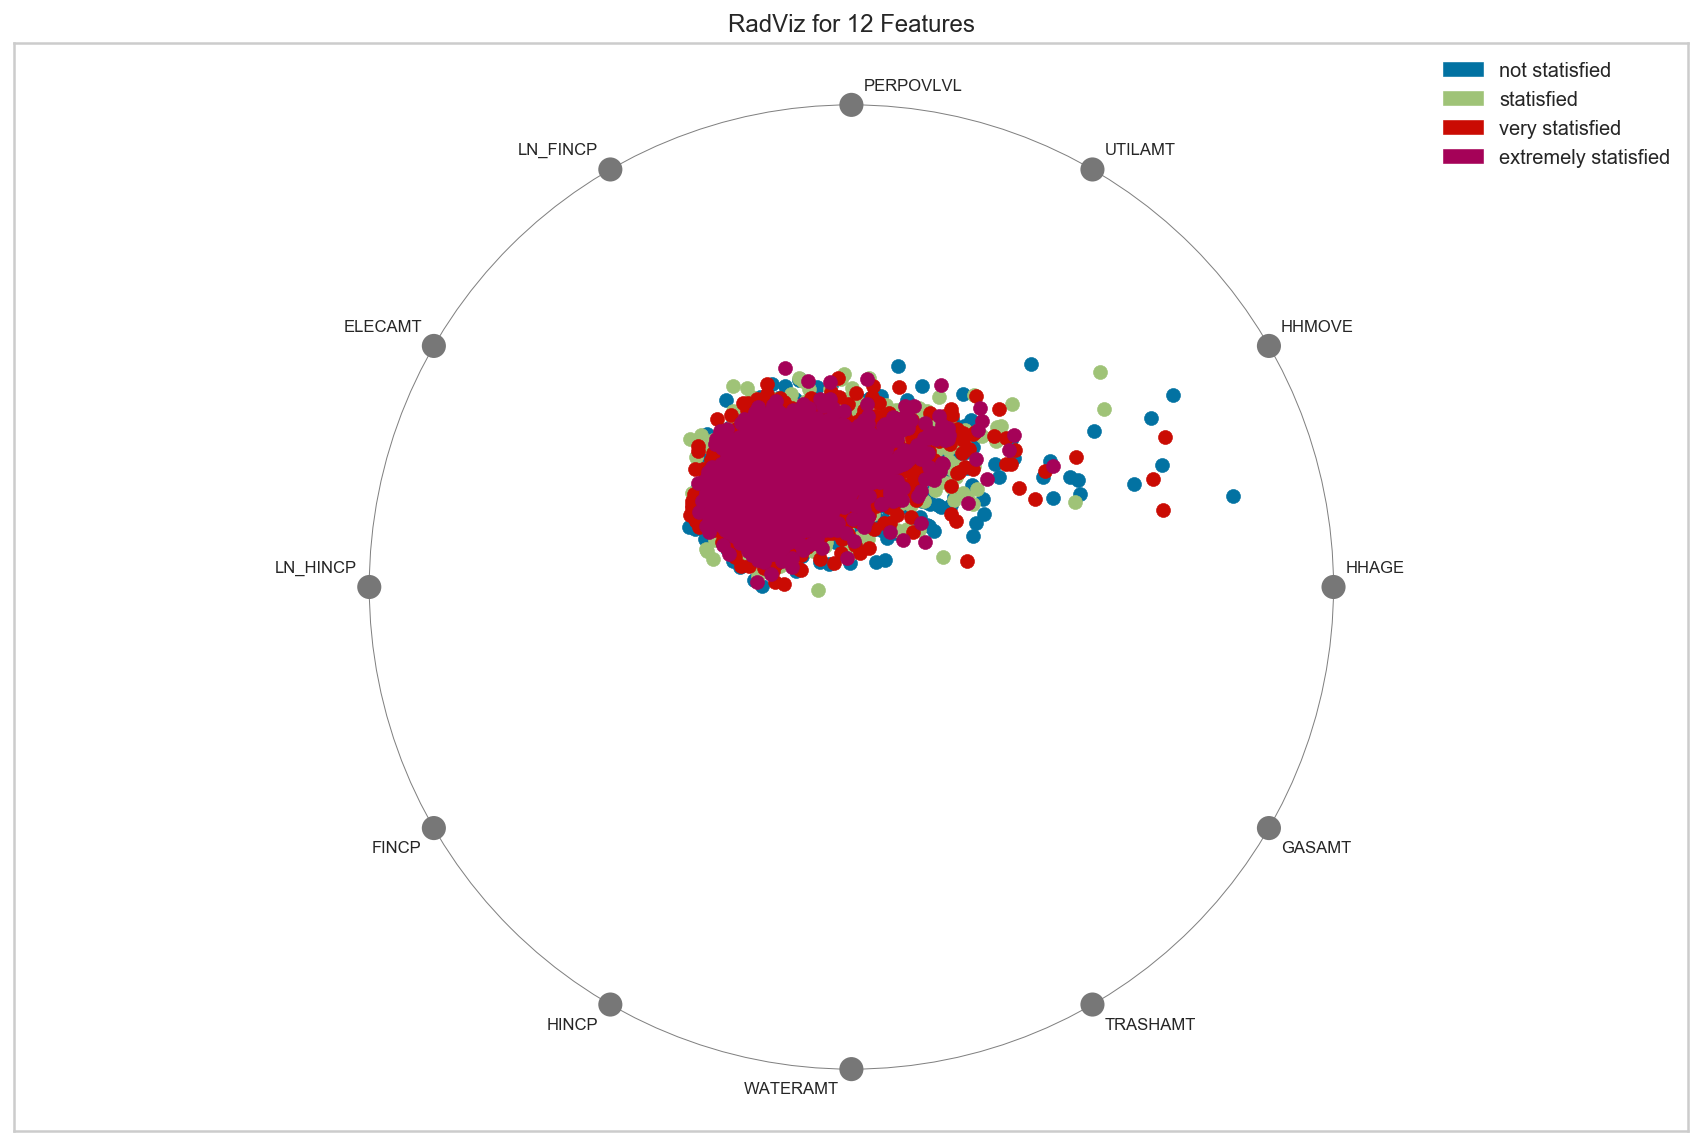

array([[6.400e+01, 1.990e+03, 2.200e+02, ..., 2.000e+00, 7.000e+01,
        3.000e+01],
       [5.200e+01, 2.004e+03, 6.400e+02, ..., 1.100e+02, 2.000e+01,
        6.000e+01],
       [3.700e+01, 2.000e+03, 2.100e+02, ..., 2.000e+00, 2.000e+00,
        3.000e+01],
       ...,
       [3.700e+01, 2.002e+03, 2.300e+02, ..., 3.000e+00, 3.000e+01,
        0.000e+00],
       [8.500e+01, 1.975e+03, 8.000e+01, ..., 3.000e+00, 0.000e+00,
        0.000e+00],
       [4.100e+01, 2.007e+03, 2.600e+02, ..., 1.000e+02, 3.000e+00,
        8.000e+01]])

In [8]:
#top 10 features from feature importances - random classifer 

from sklearn.preprocessing import LabelEncoder

X = df[['HHAGE','HHMOVE','UTILAMT','PERPOVLVL','LN_FINCP','ELECAMT','LN_HINCP', 'FINCP', 'HINCP','WATERAMT','TRASHAMT', 'GASAMT']].values
y = df['RATINGHS_BIN'].values

# Encode our target variable
y = LabelEncoder().fit_transform(y)

# Specify the target classes
classes = ["not statisfied", "statisfied", "very statisfied", "extremely statisfied"]
features = ['HHAGE','HHMOVE','UTILAMT','PERPOVLVL','LN_FINCP','ELECAMT','LN_HINCP', 'FINCP', 'HINCP','WATERAMT','TRASHAMT', 'GASAMT']

# Instantiate the visualizer
visualizer = RadViz(size=(1080, 720), 
                    classes=classes, 
                    features=features)

visualizer.fit_transform_show(X, y)

In [ ]:
# top 10 - household characteristics

X = df[['HHAGE','HHMOVE']].values
y = df['RATINGHS_BIN'].values

y = LabelEncoder().fit_transform(y)

classes = ["Unstatisfied", "Statisfied", "Highly Statisfied", "Extremely Statisfied"]
features = ['HHAGE','HHMOVE']

# Instantiate the visualizer
visualizer = RadViz(size=(1080, 720), 
                    classes=classes, 
                    features=features)

visualizer.fit_transform_show(X, y)


In [ ]:
#top 10 - expenses

X = df[['FINCP','HINCP','PERPOVLVL','GASAMT','ELECAMT','TRASHAMT', 'WATERAMT', 'UTILAMT']].values
y = df['RATINGHS_BIN'].values

y = LabelEncoder().fit_transform(y)

# Specify the target classes
classes = ["Unstatisfied", "Statisfied", "Highly Statisfied", "Extremely Statisfied"]
features = ['FINCP','HINCP','PERPOVLVL','GASAMT','ELECAMT','TRASHAMT', 'WATERAMT', 'UTILAMT']

# Instantiate the visualizer
visualizer = RadViz(size=(1080, 720), 
                    classes=classes, 
                    features=features)

visualizer.fit_transform_show(X, y)
       

In [ ]:
#household demographic

X = df[['HHAGE','HHSEX','HHRACE']].values
y = df['RATINGHS_BIN'].values

y = LabelEncoder().fit_transform(y)

# Specify the target classes
classes = ["Unstatisfied", "Statisfied", "Highly Statisfied", "Extremely Statisfied"]
features = ['HHAGE','HHSEX','HHRACE']

# Instantiate the visualizer
visualizer = RadViz(size=(1080, 720), 
                    classes=classes, 
                    features=features)

visualizer.fit_transform_show(X, y)
       

### Parallel Coordinates

In [ ]:
from yellowbrick.features import ParallelCoordinates

X = df[['HHAGE','HHMOVE','UTILAMT','PERPOVLVL','LN_FINCP','ELECAMT','LN_HINCP', 'FINCP', 'HINCP','WATERAMT','TRASHAMT', 'GASAMT']].values
y = df['RATINGHS_BIN'].values

y = LabelEncoder().fit_transform(y)

# Specify the features of interest and the classes of the target
features = ['HHAGE','HHMOVE','UTILAMT','PERPOVLVL','LN_FINCP','ELECAMT','LN_HINCP', 'FINCP', 'HINCP','WATERAMT','TRASHAMT', 'GASAMT']
classes = ["Unstatisfied", "Statisfied", "Highly Statisfied", "Extremely Statisfied"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, 
    shuffle=True, size=(1080, 720)
)

# Fit and transform the data to the visualizer
visualizer.fit_transform_show(X, y)

In [ ]:
#normalized

X = df[['HHAGE','HHMOVE','UTILAMT','PERPOVLVL','LN_FINCP','ELECAMT','LN_HINCP', 'FINCP', 'HINCP','WATERAMT','TRASHAMT', 'GASAMT']].values
y = df['RATINGHS_BIN'].values

y = LabelEncoder().fit_transform(y)

# Specify the features of interest and the classes of the target
features = ['HHAGE','HHMOVE','UTILAMT','PERPOVLVL','LN_FINCP','ELECAMT','LN_HINCP', 'FINCP', 'HINCP','WATERAMT','TRASHAMT', 'GASAMT']
classes = ["Unstatisfied", "Statisfied", "Highly Statisfied", "Extremely Statisfied"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, normalize='standard', sample=0.05, 
    shuffle=True, size=(1080, 720)
)

# Fit and transform the data to the visualizer
visualizer.fit_transform_show(X, y)

### Rank 2D

In [ ]:
#top 10 features from feature importances

from yellowbrick.features import Rank2D


X = df[['HHAGE','HHMOVE','UTILAMT','PERPOVLVL','LN_FINCP','ELECAMT','LN_HINCP', 'FINCP', 'HINCP','WATERAMT','TRASHAMT', 'GASAMT']].values
y = df['RATINGHS_BIN'].values

y = LabelEncoder().fit_transform(y)

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', size=(1080, 720))

visualizer.fit_transform_show(X, y)

In [ ]:
#rank 2D on all features

X = df[features].values
y = df['RATINGHS_BIN'].values

y = LabelEncoder().fit_transform(y)

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', size=(1080, 720))

visualizer.fit_transform_show(X, y)

### PCA Projection

In [ ]:
from yellowbrick.features.pca import PCADecomposition

X = df[['HHAGE','HHMOVE','UTILAMT','PERPOVLVL','LN_FINCP','ELECAMT','LN_HINCP', 'FINCP', 'HINCP','WATERAMT','TRASHAMT', 'GASAMT']].values
y = df['RATINGHS_BIN'].values

y = LabelEncoder().fit_transform(y)
# Create a list of colors to assign to points in the plot
colors = np.array(['r' if yi else 'b' for yi in y])

visualizer = PCADecomposition(
    scale=True, color=colors, size=(1080, 720)
)
visualizer.fit_transform_show(X, y)

### Manifold

In [ ]:
from yellowbrick.features.manifold import Manifold

X = df[['HHAGE','HHMOVE','UTILAMT','PERPOVLVL','LN_FINCP','ELECAMT','LN_HINCP', 'FINCP', 'HINCP','WATERAMT','TRASHAMT', 'GASAMT']].values
y = df['RATINGHS_BIN'].values

y = LabelEncoder().fit_transform(y)

visualizer = Manifold(
    manifold='isomap', n_neighbors=5, target='continuous', size=(1080, 720)
)

visualizer.fit_transform_show(X, y)
